In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Load the dataset
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial dataset:")
print(df.head())

Initial dataset:
   id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently      599.0  Research & Development   
1   1   35      Travel_Rarely      921.0                   Sales   
2   2   32      Travel_Rarely      718.0                   Sales   
3   3   38      Travel_Rarely     1488.0  Research & Development   
4   4   50      Travel_Rarely     1017.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        4  ...          80.0                 1   
1                        1  ...          80.0          

In [3]:
# Step 1: Handling Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
id                          0
Age                         0
BusinessTravel              2
DailyRate                   2
Department                  1
DistanceFromHome            0
Education                   0
EducationField              5
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      1
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     5
JobSatisfaction             0
MaritalStatus               1
MonthlyIncome               0
MonthlyRate                 2
NumCompaniesWorked          1
Over18                      0
OverTime                    8
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               4
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion

In [4]:
# Drop columns with a high percentage of missing values or decide on imputation strategy
# Example: Drop columns with more than 30% missing values
threshold = 0.3
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)
df = df.drop(columns=['id'])

In [5]:
# Impute missing values in numerical columns with mean or median
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'constant' as well
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
print(numerical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')


In [6]:
# Impute missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])
print(categorical_columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
# confirm there are no missing values now
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager   

In [8]:
summary_stats = df.describe(include='all').transpose()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                           count unique                     top  freq  \
Age                       1677.0    NaN                     NaN   NaN   
BusinessTravel              1677      3           Travel_Rarely  1290   
DailyRate                 1677.0    NaN                     NaN   NaN   
Department                  1677      3  Research & Development  1167   
DistanceFromHome          1677.0    NaN                     NaN   NaN   
Education                 1677.0    NaN                     NaN   NaN   
EducationField              1677      6           Life Sciences   779   
EmployeeCount             1677.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1677.0    NaN                     NaN   NaN   
Gender                      1677      2                    Male  1064   
HourlyRate                1677.0    NaN                     NaN   NaN   
JobInvolvement            1677.0    NaN                     NaN   NaN   
JobLevel                  1677.

In [9]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.039877         -0.049025   0.223545   
DailyRate                 0.039877   1.000000          0.024417  -0.007092   
DistanceFromHome         -0.049025   0.024417          1.000000  -0.011436   
Education                 0.223545  -0.007092         -0.011436   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EnvironmentSatisfaction   0.029557   0.006315          0.004959  -0.011189   
HourlyRate                0.030628  -0.001482          0.006191   0.014862   
JobInvolvement            0.002101  -0.026977          0.010035   0.052390   
JobLevel                  0.479015   0.041376         -0.051008   0.085823   
JobSatisfaction          -0.009273  -0.036970          0.026309  -0.030686   
MonthlyIncome             0.470758   0.027653         -0.061019   0.081054   
MonthlyRate               0.011732  -0.0125

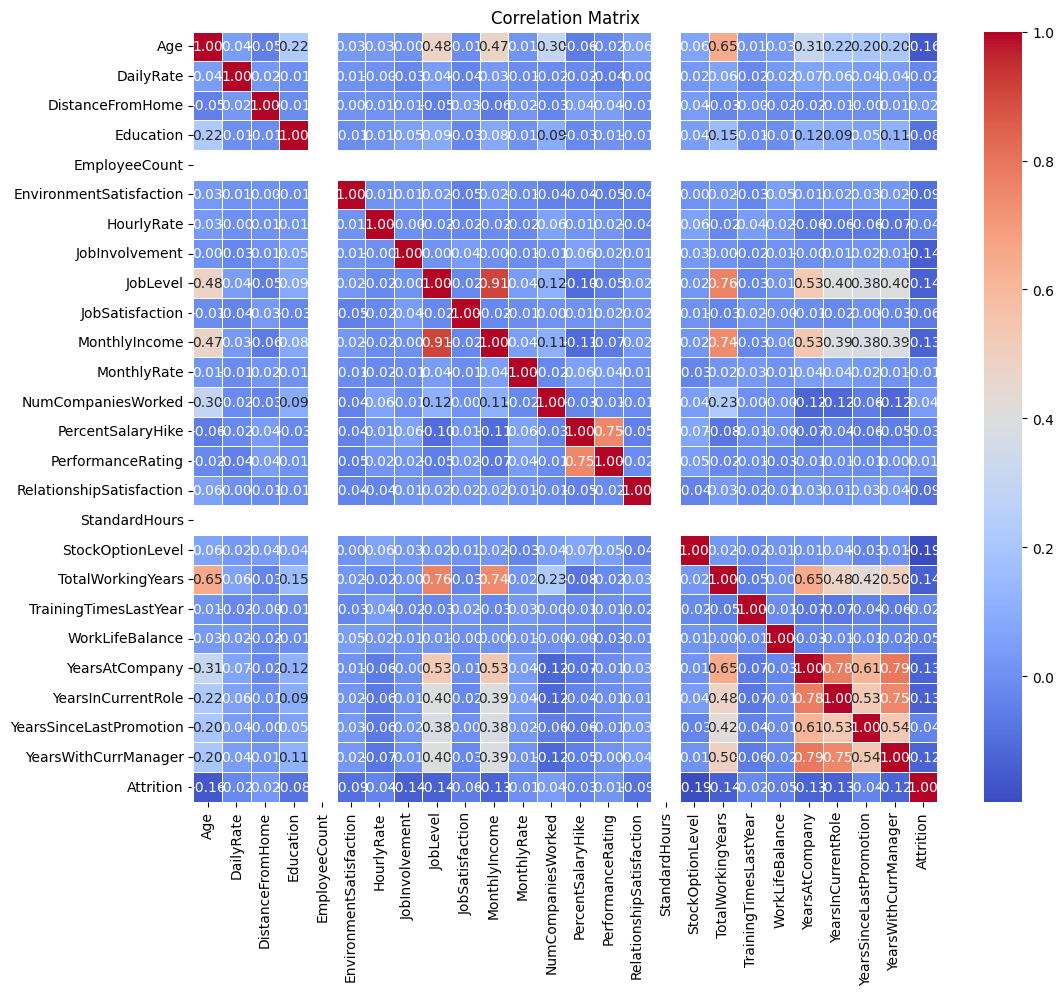

In [10]:
# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

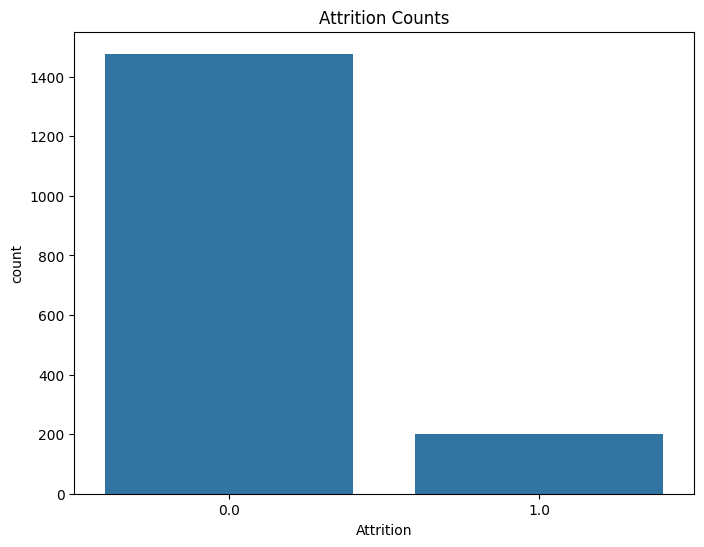

In [11]:
# Visualization 1: Bar plot of Attrition counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Counts')
plt.show()

# Insight 1: The bar plot shows the distribution of Attrition, indicating the number of employees who left (Yes) and stayed (No).

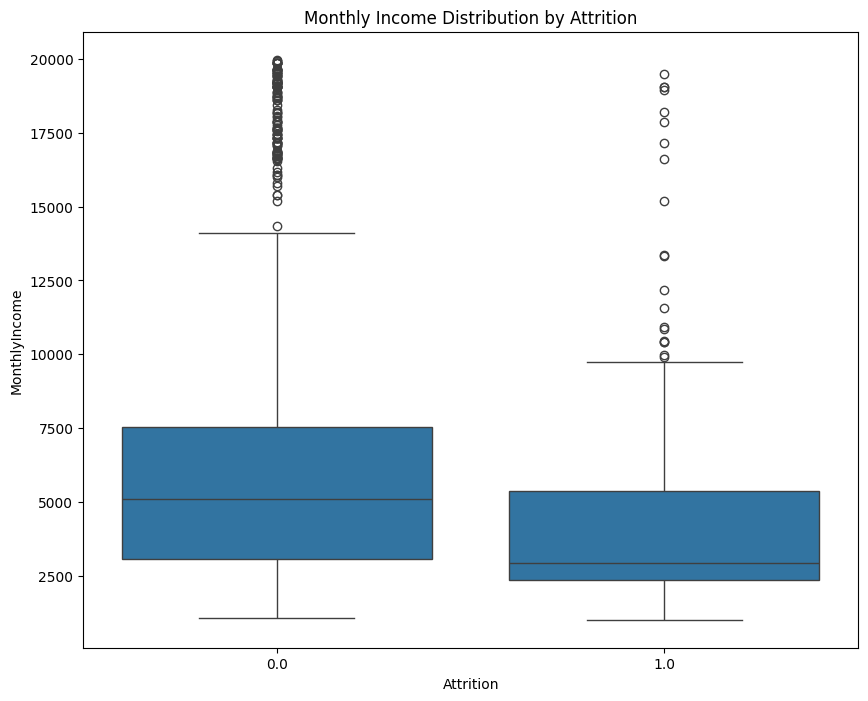

In [12]:
# Visualization 2: Box plot of MonthlyIncome by Attrition
plt.figure(figsize=(10, 8))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

# Insight 2: Employees who left (Attrition=Yes) tend to have lower median monthly incomes compared to those who stayed.

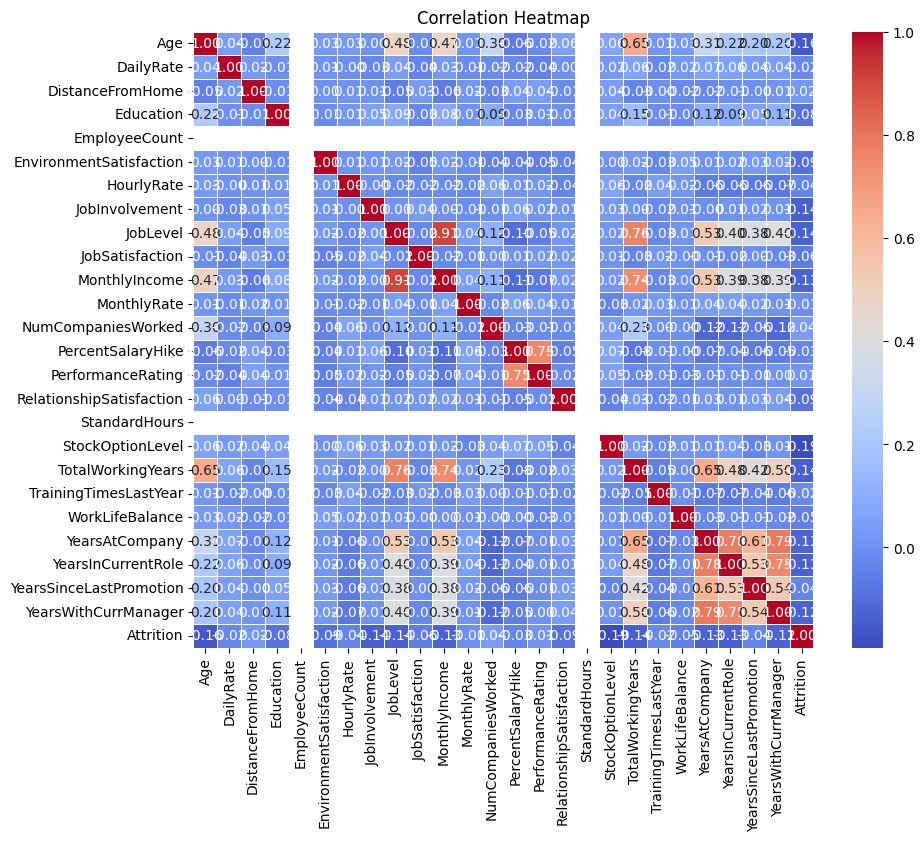

In [13]:
# Visualization 3: Correlation heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insight 3: The correlation heatmap visually represents the correlation coefficients between numerical variables.

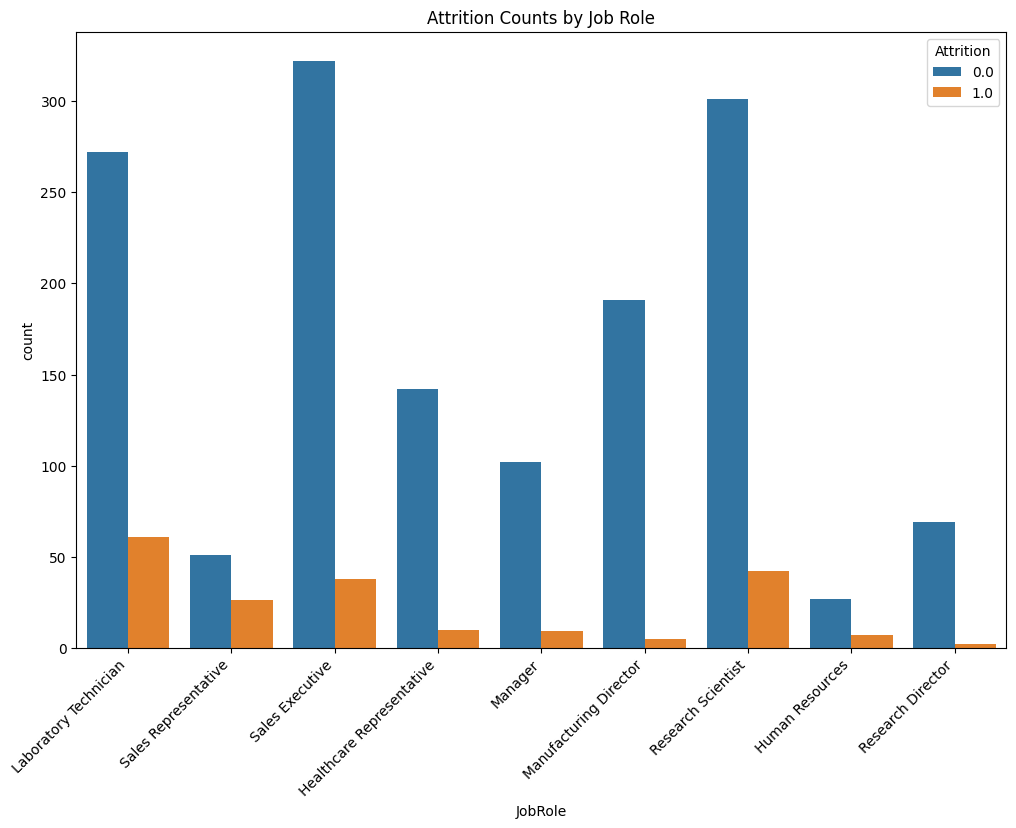

In [14]:
# Visualization 4: Bar plot of Job Roles
plt.figure(figsize=(12, 8))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition Counts by Job Role')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight 4: The bar plot illustrates the distribution of Attrition across different job roles, providing insights into which roles have higher attrition rates.

In [15]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the dataset after Label Encoding
print("\nDataset after Label Encoding:")
print(df.head())


Dataset after Label Encoding:
    Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0  36.0               1      599.0           1              24.0        3.0   
1  35.0               2      921.0           2               8.0        3.0   
2  32.0               2      718.0           2              26.0        3.0   
3  38.0               2     1488.0           1               2.0        3.0   
4  50.0               2     1017.0           1               5.0        4.0   

   EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  ...  \
0               3            1.0                      4.0       1  ...   
1               4            1.0                      1.0       1  ...   
2               2            1.0                      3.0       1  ...   
3               3            1.0                      3.0       0  ...   
4               3            1.0                      2.0       0  ...   

   StandardHours  StockOptionLevel  TotalWorkingY

In [16]:
# Apply One-Hot Encoding to categorical columns
df_onehot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the dataset after One-Hot Encoding
print("\nDataset after One-Hot Encoding:")
print(df_onehot.head())


Dataset after One-Hot Encoding:
    Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  36.0      599.0              24.0        3.0            1.0   
1  35.0      921.0               8.0        3.0            1.0   
2  32.0      718.0              26.0        3.0            1.0   
3  38.0     1488.0               2.0        3.0            1.0   
4  50.0     1017.0               5.0        4.0            1.0   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                      4.0        42.0             3.0       1.0   
1                      1.0        46.0             3.0       1.0   
2                      3.0        80.0             3.0       2.0   
3                      3.0        40.0             3.0       2.0   
4                      2.0        37.0             3.0       5.0   

   JobSatisfaction  ...  JobRole_2  JobRole_3  JobRole_4  JobRole_5  \
0              4.0  ...       True      False      False      False   
1              1.0 

In [18]:
# Assuming 'Attrition' is the target variable
target_column = 'Attrition'

# Select features (X) and target variable (y)
X = df_onehot.drop(target_column, axis=1)
y = df_onehot[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


joblib.dump(imputer, 'imputer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(model, 'employee_attrition.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8988095238095238

Confusion Matrix:
[[289   3]
 [ 31  13]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       292
         1.0       0.81      0.30      0.43        44

    accuracy                           0.90       336
   macro avg       0.86      0.64      0.69       336
weighted avg       0.89      0.90      0.88       336

